# 13. 프로젝트 : 주식 예측에 도전해 보자

## 순서 

1. 데이터 다운로드
2. 시계열 데이터 준비
3. 데이터 전처리 
4. 시계열 안정성 분석
5. 학습, 테스트 데이터셋 생성
6. 적정 ARIMA 모수 찾기
7. ARIMA 모델 훈련과 테스트
8. 다른 주식 종목 예측해 보기

## 노드 정리
### 1. 시계열 데이터
시계열(Time-Series) 데이터는 미래 예측의 근거가 되는 데이터로, 시간 순서대로 발생한 데이터의 수열로 나타나는 데이터이다. 시계열을 수식으로 나타내면 아래와 같다. 
$ Y = \{Y_t: t \in T\}$, where T is the index set

예: 주가 데이터, 연간 온도 데이터, 연간 상품 판매 데이터 등 

### 2. 안정적 데이터
안정적(Stationary, 정상성이라고도 함)이라는 뜻은 시계열 데이터의 통계적 특성(평균, 분산, 두 시점간 공분산-자기공분산)이 변하지 않는다는 뜻이고, 안정적 데이터에 대해서만 미래 예측이 가능하다. 

### 3. 정성적 vs 정량적 
'정성적'의 의미는 말로 설명하는 것이고, '정량적'은 수치로 측정하고 표현하는 것을 의미한다. 따라서 정성적 분석이란 말로 데이터를 분석한 것이고, 정량적 분석이란 구체적인 수치를 통해 데이터를 분석한 것을 의미한다. (참고: [정량적 연구와 정성적 연구의 차이](https://ko.surveymonkey.com/mp/quantitative-vs-qualitative-research/))

### 4. Augmented Dickey-Fuller Test(ADF Test)
ADF test는 시계열 데이터의 안정성을 테스트하는 통계적 방법이다. 이 방법은 주어진 시계열 데이터가 안정적이지 않다는 귀무가설(Null Hypothesis)를 세운 후, 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에 이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택한다. 귀무가설의 기각/채택의 기준이 되는 것은 유의수준이라고 불리는 __p-value__ 이다. 표본의 유의확률은 관찰된 데이터가 귀무가설과 양립하는 정도를 0에서 1 사이의 수치로 표현한 것이고, 유의확률이 작을수록 귀무가설을 기각한다. 보통 사용하는 유의확률은 __0.05 - 0.005__ 정도로, 이 값 이하의 p값에서 '유의미하다'라고 표현한다. (참고: [유의확률](https://ko.wikipedia.org/wiki/%EC%9C%A0%EC%9D%98_%ED%99%95%EB%A5%A0))

### 5. 시계열 분해((Time series decomposition)
안정적이지 않은 시계열을 안정적인 시계열로 바꾸는 방법이다. 시계열에 따라 사용하는 모델이 달라지는데, 여기서는 승법모형(multiplicative model)을 사용한다. 그 이유는 시계열 데이터가 앞의 변동요인으로 구성되기 때문이다. 

>승법모형은 관심변수의 관측값인 $Z_t$가 앞의 네 가지 시계열 변동요인의 곱으로 설명될 수 있다는 가정하에 만들어진 모형이다. 
>$Z_t=T_tC_tS_tR_t$ ($T_t$: 추세변동, $C_t$: 순환변동, $S_t$: 계절변동, $R_t$: 불규칙변동)
>승법모형은 추세변동의 값만 원래 단위로 표현하고, 나머지 변동요인은 백분율 또는 비율로 표현한다.           
(참고: http://elearning.kocw.net/contents4/document/lec/2013/Konkuk/Leegiseong/5.pdf)

### ARIMA 모델
__ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average)__ 가 합쳐진 모델이다.

#### AR(Autoregressive) 
- 자기회귀(AR)란 __$Y_t$가 이전 p개의 데이터 $Y_{t−1}, Y_{t−2}, .., Y_{t−p}$의 가중합으로 수렴__한다고 보는 모델이다.
- AR은 일반적인 시계열에서 __Residual에 해당하는 부분을 모델링한다__ 고 볼 수 있다.
- 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 AR로 모델링하는 관점이다.

#### I(Integrated) 
- 차분누적은 __$Y_t$이 이전 데이터와 d차 차분의 누적(integration) 합__ 이라고 보는 모델이다.
- d=1이라면 $Y_t$는 $Y_{t−1}$과 $ΔY_{t−1}$ 의 합이다.
- I는 일반적인 시계열에서 __Seasonality에 해당하는 부분을 모델링__ 한다.

#### MA(Moving Average)
- 이동평균(MA)은 __$Y_t$가 이전 q개의 예측오차값 $e_{t−1}, e_{t−2}, ..., e_{t−q}$ 의 가중합으로 수렴한다__ 고 보는 모델이다.
- MA는 일반적인 시계열에서 __Trend에 해당하는 부분을 모델링__ 한다. 예측오차값 $e_{t−1}$이 +라면 모델 예측보다 관측값이 더 높았다는 뜻이므로, 다음 $Y_t$
 예측 시에는 예측치를 올린다.
- 주식값은 항상 최근의 증감 패턴이 지속될 것이라고 예측하는 관점이 바로 주식 시계열을 MA로 모델링하는 관점이다.

#### ARIMA 모델의 모수 p, q, d
ARIMA를 활용해서 시계열 예측 모델을 성공적으로 만들기 위해서는 ARIMA의 모수(parameter)를 데이터에 맞게 설정해야 한다. 

ARIMA의 모수는 __자기회귀 모형(AR)의 시차를 의미하는 p, 차분(diffdrence) 횟수를 의미하는 d, 이동평균 모형(MA)의 시차를 의미하는 q__ 이다.

__p와 q는 통상적으로 p + q < 2, p * q = 0__ 인 값들을 사용하는데, 이는 p 나 q 중 하나의 값이 0이라는 뜻이다. 이렇게 하는 이유는 실제로 __대부분의 시계열 데이터는 자기회귀 모형(AR)이나 이동평균 모형(MA) 중 하나의 경향만을 강하게 띠기 때문__ 이다. (시계열 데이터는 1) 일정한 균형을 유지하거나 2) 증감 패턴을 보인다.)

__모수 p,d,q는 ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function)을 통해 결정__ 할 수 있다. __ACF 는 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수__ 이며, __PACF 는 다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수__ 이다.

## 1. 데이터 다운로드 
실제 주식값 예측에 도전한다. 데이터는 과거의 일자별 시세이며, 다음의 그림과 같이 [Yahoo Finance](https://finance.yahoo.com/?guccounter=1&guce_referrer=aHR0cHM6Ly9haWZmZWxzdGF0aWNwcmQuYmxvYi5jb3JlLndpbmRvd3MubmV0Lw&guce_referrer_sig=AQAAAIKOanJaiv3ccpLZURGH6pqmV8s5E4-3dHZdjpwAEZQD9XxRZ6J5ci8embzGgDZBidRVLO3EarL7EKokU7TFsEUK_rJ_zBtE09rIeFH4RAX9T3crlL6JpiV6h90Vfb3vc_nZqQbSssgAwKFvebm4GfG3r7xE3gF8RPDOTrxz4Stn)에서 다운로드할 수 있다.

- 원하는 기업을 검색 -> 'Historical Data' 탭 -> 'Time Period'에서 'Max' 선택 -> 'Apply' : 기업의 상장 시점부터 최근까지의 자료 조회 가능

## 2. 시계열 데이터 준비


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 불러오기
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/LGHL.csv'

# 시계열 생성 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)

df.head()

Duplicate key in file PosixPath('/home/aiffel-dj44/Downloads/aiffel/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 253 ('font.family:  sans-serif')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-21,10.000,10.75,9.61,9.80,9.80,12400
2019-06-24,9.750,9.75,9.75,9.75,9.75,4900
2019-06-25,9.755,9.76,9.75,9.75,9.75,593300
2019-06-26,9.750,9.76,9.72,9.75,9.75,288100
2019-06-27,9.740,9.75,9.74,9.74,9.74,6500


- parse_date: 파일을 로드할때 특정 칼럼을 datetime 자료형으로 파싱한다.
(참고: https://velog.io/@skyepodium/pandas-readcsv)

If a column or index cannot be represented as an array of datetimes, say because of an unparsable value or a mixture of timezones, the column or index will be returned unaltered as an object data type.
(참고: [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html))

칼럼 종류는 [Date, Open, High, Low, Close, Adj Close, Volume
날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)]이지만 여기서는 'Close'(종가)만 사용한다. 종가란 하루의 장이 마감했을 때의 가격이다.

In [2]:
# 종가만 사용하는 데이터 준비
ts = df['Close']

# 데이터 확인
ts.head()

Date
2019-06-21    9.80
2019-06-24    9.75
2019-06-25    9.75
2019-06-26    9.75
2019-06-27    9.74
Name: Close, dtype: float64

## 3. 데이터 전처리 
- 결측치 처리
- 로그 변환 

우선 시계열 데이터를 차트로 그려 어떻게 생겼는지 본다.

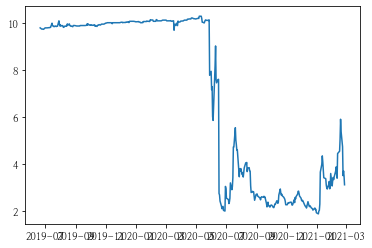

In [3]:
plt.plot(ts)

### 결측치 
결측치를 확인하고, 결측치가 있다면 time을 보간 기준으로 하여 보간한다.

In [4]:
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

이 데이터의 결측치는 없다. 

In [5]:
# 결측치 처리 (하지 않아도 되지만 한 번 해본다.)
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

위의 그래프를 보았을 때, 데이터가 시간이 흐름에 따라 분산이 커짐을 알 수 있다. 시계열이 이런 특성을 보이면 로그함수로 변환을 해주어 분산을 줄여준다.

### 로그 변환

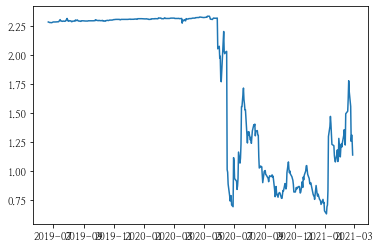

In [6]:
# 로그 변환 시도 
ts_log = np.log(ts)
plt.plot(ts_log)

## 4. 시계열 안정성 분석
- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

### 정성적 그래프 분석
시각화를 통해 안정성 여부를 확인한다. 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화하는 함수를 만든다. 현재 타임스텝부터 window에 주어진 타임스텝 이전 사이 구간의 평균(rolling mean, 이동평균)과 표준편차(rolling std, 이동표준편차)를 원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있다. 그 후 구간 통계치 시각화 함수로 한 번 시각화해본다.

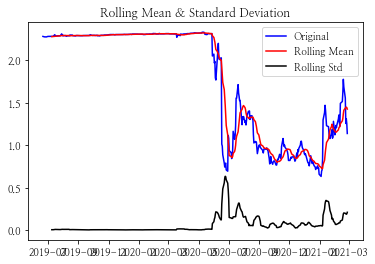

In [7]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
plot_rolling_statistics(ts_log, window=12)

정성적 그래프로 분석했을 때, 이 시계열 데이터는 시간의 추이에 따라 평균과 분산이 증가하므로 안정적이지 않다. 따라서 불안정적 시계열 데이터에 대한 시계열 분석 기법을 통해 미래를 예측해본다. 

### 정량적 Augmented Dicky-Fuller Test
statsmodels 패키지의 adfuller 메소드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행한다. 


In [8]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


- adfuller(timeseries, autolag='AIC'): autolag{“AIC”, “BIC”, “t-stat”, None}       
>Method to use when automatically determining the lag length among the values 0, 1, …, maxlag. If “AIC” (default) or “BIC”, then the number of lags is chosen to minimize the corresponding information criterion. “t-stat” based choice of maxlag. Starts with maxlag and drops a lag until the t-statistic on the last lag length is significant using a 5%-sized test. If None, then the number of included lags is set to maxlag.([참고](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html))

In [9]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.038534
p-value                          0.738952
#Lags Used                      18.000000
Number of Observations Used    406.000000
Critical Value (1%)             -3.446560
Critical Value (5%)             -2.868685
Critical Value (10%)            -2.570576
dtype: float64


이 시계열이 안정적이지 않다는 귀무가설은 p-value=0.928173 > 0.5이므로 이 귀무가설은 기각할 수 없다. 따라서 이 시계열은 안정적인 시계열이 아니다. 

바로 시계열 분해로 들어가도 되지만 정리하는 차원에서 기존의 시계열을 가공/변형해 본다. 기존의 시계열을 가공/변형하는 방법은 아래와 같다.

- 로그함수로 변환
- 추세(trend) 상쇄: Moving average제거
- 계절성(Seasonality) 상쇄: 차분(Differencing)

위에서 로그함수로 데이터를 변환하였으므로 생략하고 Moving Average(rolling mean)를 구해 ts_log에서 빼서 추세를 상쇄한다.

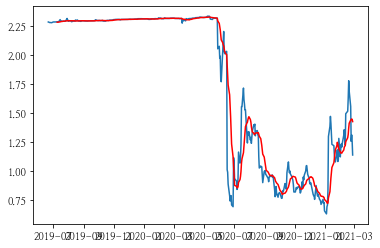

In [10]:
# window = 12

moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [11]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Date
2019-06-21         NaN
2019-06-24         NaN
2019-06-25         NaN
2019-06-26         NaN
2019-06-27         NaN
2019-06-28         NaN
2019-07-01         NaN
2019-07-02         NaN
2019-07-03         NaN
2019-07-05         NaN
2019-07-08         NaN
2019-07-09    0.003144
2019-07-10    0.003059
2019-07-11    0.003481
2019-07-12    0.002885
Name: Close, dtype: float64

Moving Average 계산 시 (windows size=12인 경우) 앞의 11개의 데이터는 Moving Average가 계산되지 않으므로 ts_log_moving_avg에 결측치(NaN)가 발생한다. 이 결측치들은 Dicky-Fuller Test 시에 에러를 발생시키므로 이를 데이터셋에서 제거한다.

In [12]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2019-07-09    0.003144
2019-07-10    0.003059
2019-07-11    0.003481
2019-07-12    0.002885
2019-07-15    0.018939
2019-07-16    0.006605
2019-07-17    0.004412
2019-07-18    0.003735
2019-07-19    0.000270
2019-07-22    0.002633
2019-07-23    0.000098
2019-07-24   -0.000325
2019-07-25    0.000180
2019-07-26   -0.000328
2019-07-29    0.020365
Name: Close, dtype: float64

이제 이전 스텝에서 정의했던 메소드들을 활용하여 ts_log_moving_avg를 정성, 정량적으로 분석한다.

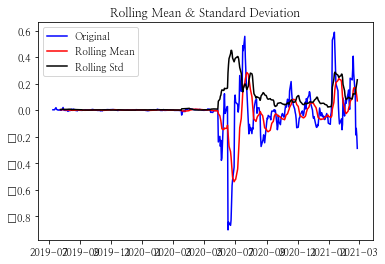

Results of Dickey-Fuller Test:
Test Statistic                  -4.321354
p-value                          0.000408
#Lags Used                      18.000000
Number of Observations Used    395.000000
Critical Value (1%)             -3.447014
Critical Value (5%)             -2.868885
Critical Value (10%)            -2.570683
dtype: float64


In [13]:
plot_rolling_statistics(ts_log_moving_avg)
augmented_dickey_fuller_test(ts_log_moving_avg)

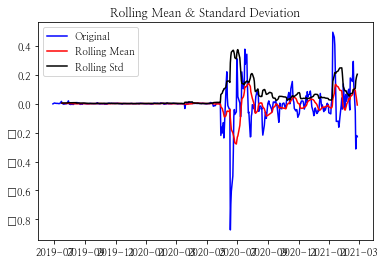

Results of Dickey-Fuller Test:
Test Statistic                -5.683285e+00
p-value                        8.390236e-07
#Lags Used                     1.700000e+01
Number of Observations Used    4.020000e+02
Critical Value (1%)           -3.446722e+00
Critical Value (5%)           -2.868757e+00
Critical Value (10%)          -2.570614e+00
dtype: float64


In [14]:
# window = 6
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

plot_rolling_statistics(ts_log_moving_avg_6)
augmented_dickey_fuller_test(ts_log_moving_avg_6)

window = 6, 12일 때 모두 p-value가 매우 작으므로 이 시계열 데이터는 안정적이라고 할 수 있다. 이제 시계열 분해로 안정적인 시계열로 바꿔본다.


### 시계열 분해(Time Series Decomposition)
안정적이지 않은 시계열을 안정적인 시계열로 바꾸기 위해 시계열 분해를 한다. statsmodels 라이브러리 안에는 seasonal_decompose 메소드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리 해 낼 수 있는 기능이 있다. 이 기능을 활용하여 훨씬 안정적인 시계열을 분리할 수 있다. 위에서 구했던 로그변환 단계(ts_log)에서부터 출발한다.

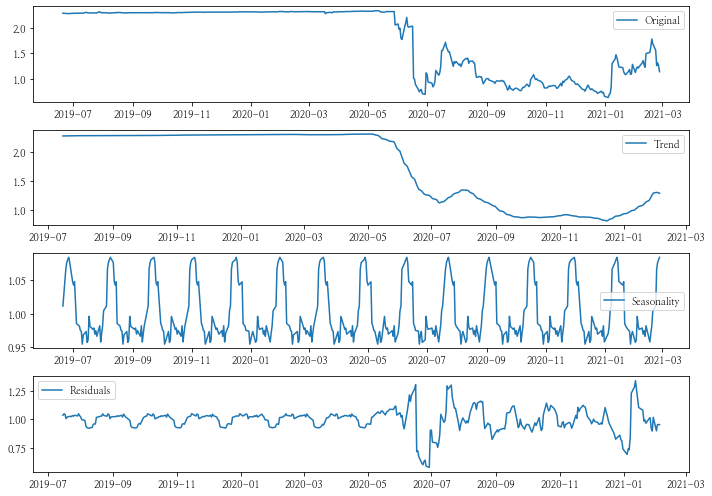

In [15]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 7))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Residual 안정성 확인
Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지가 Residual이다. Residual에 대해 안정성 여부를 살펴본다.

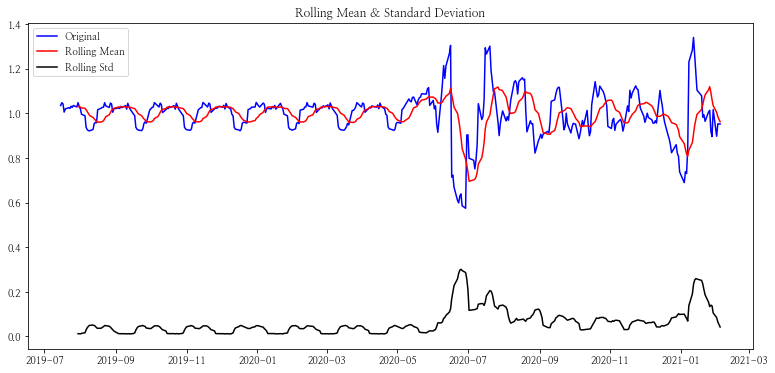

In [16]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [17]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.220032e+00
p-value                        5.250662e-08
#Lags Used                     1.700000e+01
Number of Observations Used    3.770000e+02
Critical Value (1%)           -3.447815e+00
Critical Value (5%)           -2.869237e+00
Critical Value (10%)          -2.570870e+00
dtype: float64


Decomposing을 통해 얻어진 Residual은 매우 낮은 p-value를 보여 준다. 즉 예측 가능한 수준의 안정적인 시계열이 얻어졌다. 

## 5. 학습, 테스트 데이터셋 생성
학습데이터와 평가데이터를 9:1로 나눈다. 

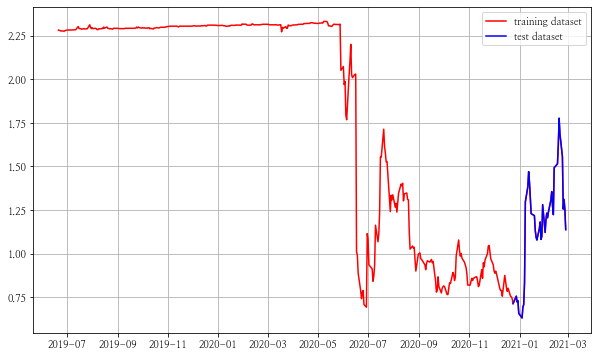

In [18]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

데이터셋의 형태를 확인해본다. 

In [19]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2019-06-21    2.282382
2019-06-24    2.277267
Name: Close, dtype: float64
(382,)
(43,)


## 6. 적정 ARIMA 모수 찾기
- ACF, PACF 그려보기 -> p,q 구하기
- 차분 안정성 확인 -> d 구하기

### ACF, PACF 그려보기 -> p,q 구하기
statsmodels에서 제공하는 ACF와 PACF 플로팅 기능을 사용하여 ACF, PACF를 그린 후, 자기회귀모형(AR)의 시차인 p, 이동모형 균형(MA)의 시차인 q를 구한다. 

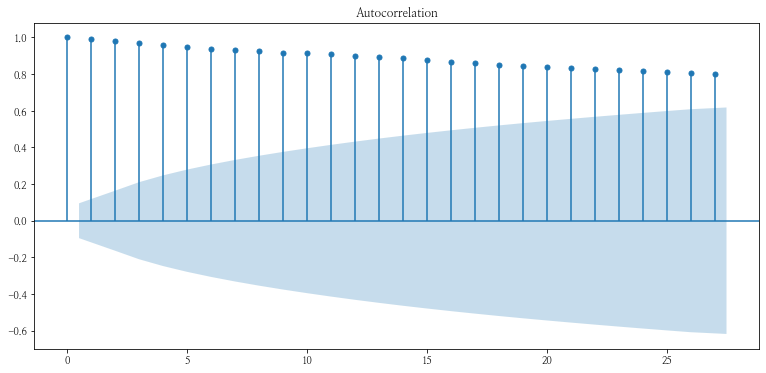

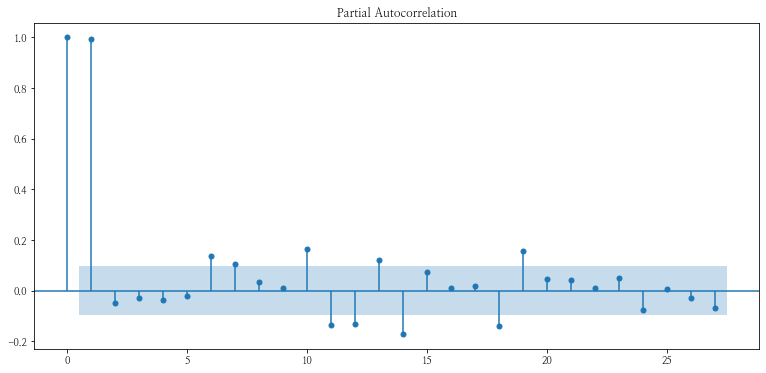

In [20]:
# ACF, PACF 그려보기 -> p,q 구하기

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

![](https://images.velog.io/images/guide333/post/75b9c834-20b9-4c7f-a535-76a1b4d368c8/Screenshot%20from%202021-02-25%2013-52-37.png)

위의 그림은 ACF를 통해 MA 모델의 시차 q를 결정하고, PACF를 통해 AR 모델의 시차 q를 결정할 수 있음을 보여주는 표이다. 

ACF 그래프가 매우 느리게 내려가므로 이 데이터는 안정적이 아니고 추세가 없음을 알 수 있다. 

PACF 그래프는 시차 p 1에서 유의미한 막대가 있고 그 이후로는 없다. 즉 시차 p 2이상에서는 거의 0에 가깝다. 현재 데이터와 시차 2 이상 떨어진 데이터는 상관도가 없기 때문에 고려할 필요가 없다는 뜻이다. 위의 표에 의하면 p=1이다. 

따라서 이 데이터는 AR(1) 모델에 유사한 형태를 보인다. 그러나 q에 대해서는 적합한 값이 없어 보이므로 q=0으로 둘 수 있다. (하지만 q를 바꿔가며 확인하는 것도 좋다.)

### 차분 안정성 확인 -> d 구하기
d차 차분을 구하여 시계열이 안정된 상태인지 확인한다.

Results of Dickey-Fuller Test:
Test Statistic                  -5.398362
p-value                          0.000003
#Lags Used                      17.000000
Number of Observations Used    406.000000
Critical Value (1%)             -3.446560
Critical Value (5%)             -2.868685
Critical Value (10%)            -2.570576
dtype: float64


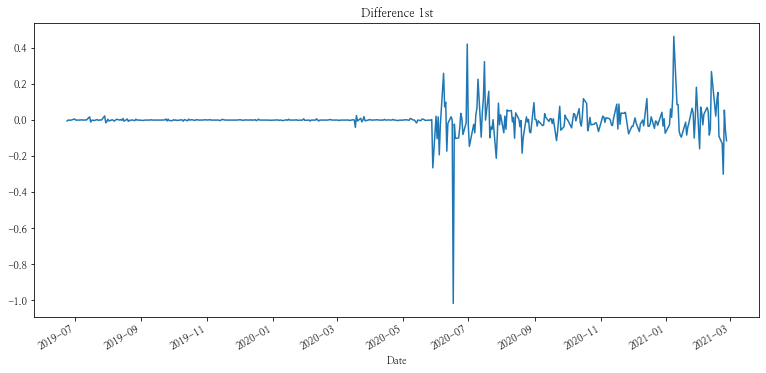

In [21]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

1차 차분했을 때 데이터가 안정적임을 알 수 있다.

## 7. ARIMA 모델 훈련과 테스트
- ARIMA 모델 빌드와 훈련
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

### ARIMA 모델 빌드와 훈련
일단 p=1, d=1, q=0을 모수로 가지는 ARIMA 모델을 훈련한다. 

In [22]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  381
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 457.390
Method:                       css-mle   S.D. of innovations              0.073
Date:                Mon, 01 Mar 2021   AIC                           -908.780
Time:                        18:56:12   BIC                           -896.952
Sample:                             1   HQIC                          -904.087
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0040      0.004     -1.053      0.292      -0.012       0.003
ar.L1.D.Close     0.0283      0.051      0.552      0.581      -0.072       0.128
                                    Root

/home/aiffel-dj44/Downloads/aiffel/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aiffel-dj44/Downloads/aiffel/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


P>|z|이 학습의 적정성을 위해 확인되는 t-test 값이다.p-value=0.05수준에서 MA(1)은의 계수는 유효하고, 모형의 constant는 유효하지 않다. 따라서 trend='nc'로 설정한다. 

>ARIMA.fit(start_params=None, trend='c', method='css-mle', transparams=True, solver='lbfgs', maxiter=500, full_output=1, disp=5, callback=None, start_ar_lags=None, **kwargs)    
>- trend: c or nc     
c는 상수 포함, nc는 상수를 포함하지 않음.
>- disp: 출력의 frequency를 통제한다. -1은 출력이 없다는 뜻이다.

훈련데이터에 대해 ARIMA 모델이 잘 fit하는지 시각화해본다.

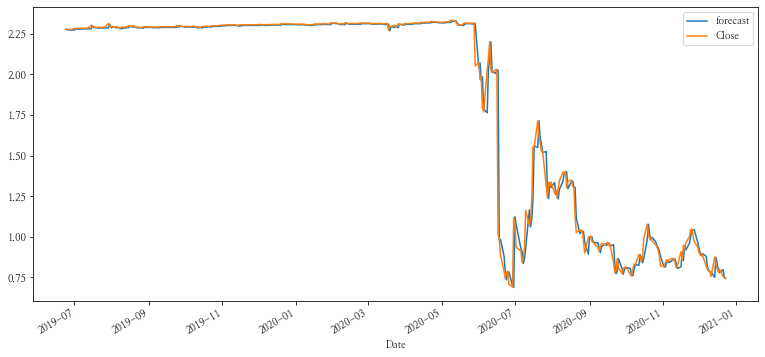

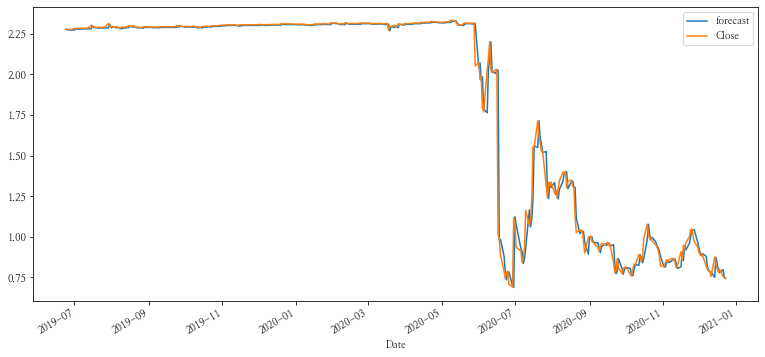

In [23]:
fitted_m.plot_predict()

forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측한다.

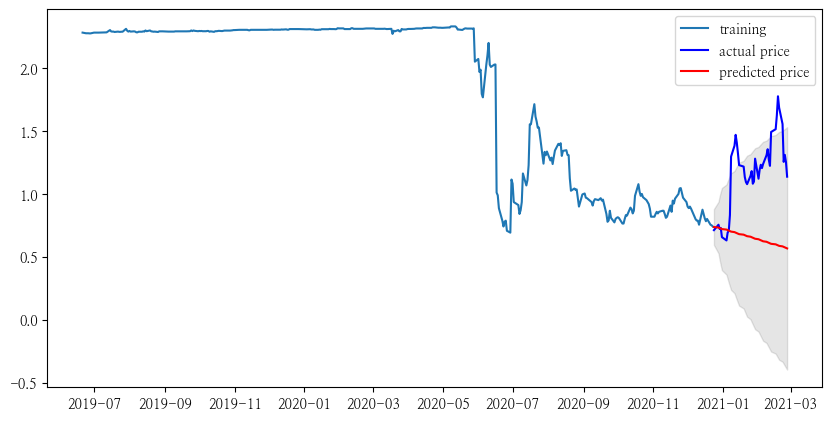

In [24]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

최종적인 모델의 오차율을 계산하려면, 그동안 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 한다. np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산한다. 

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  3.112666581990291
MAE:  1.4719552465702541
RMSE:  1.7642750868246966
MAPE: 38.53%


MAPE 기준 38.53%의 오차율을 보인다.

# 1년치 데이터

## 2. 시계열 데이터 준비

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 불러오기
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/LGHL_1y.csv'

# 시계열 생성 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,10.13,10.13,10.13,10.13,10.13,0
2020-03-03,10.10,10.10,10.10,10.10,10.10,100000
2020-03-04,10.10,10.10,10.10,10.10,10.10,0
2020-03-05,10.10,10.10,10.10,10.10,10.10,0
2020-03-06,10.10,10.10,10.10,10.10,10.10,0


- parse_date: 파일을 로드할때 특정 칼럼을 datetime 자료형으로 파싱한다.
(참고: https://velog.io/@skyepodium/pandas-readcsv)

If a column or index cannot be represented as an array of datetimes, say because of an unparsable value or a mixture of timezones, the column or index will be returned unaltered as an object data type.
(참고: [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html))

칼럼 종류는 [Date, Open, High, Low, Close, Adj Close, Volume
날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)]이지만 여기서는 'Close'(종가)만 사용한다. 종가란 하루의 장이 마감했을 때의 가격이다.

In [29]:
# 종가만 사용하는 데이터 준비
ts = df['Close']

# 데이터 확인
ts.head()

Date
2020-03-02    10.13
2020-03-03    10.10
2020-03-04    10.10
2020-03-05    10.10
2020-03-06    10.10
Name: Close, dtype: float64

## 3. 데이터 전처리 
- 결측치 처리
- 로그 변환 

우선 시계열 데이터를 차트로 그려 어떻게 생겼는지 본다.

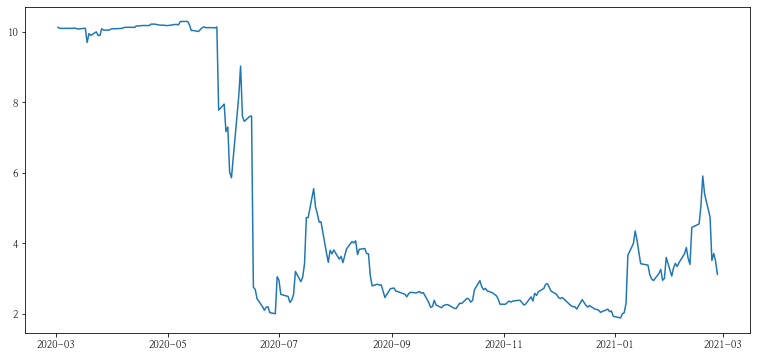

In [30]:
plt.plot(ts)

### 결측치 
결측치를 확인하고, 결측치가 있다면 time을 보간 기준으로 하여 보간한다.

In [31]:
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

이 데이터의 결측치는 없다. 

In [32]:
# 결측치 처리 (하지 않아도 되지만 한 번 해본다.)
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

위의 그래프를 보았을 때, 데이터가 시간이 흐름에 따라 분산이 커짐을 알 수 있다. 시계열이 이런 특성을 보이면 로그함수로 변환을 해주어 분산을 줄여준다.

### 로그 변환

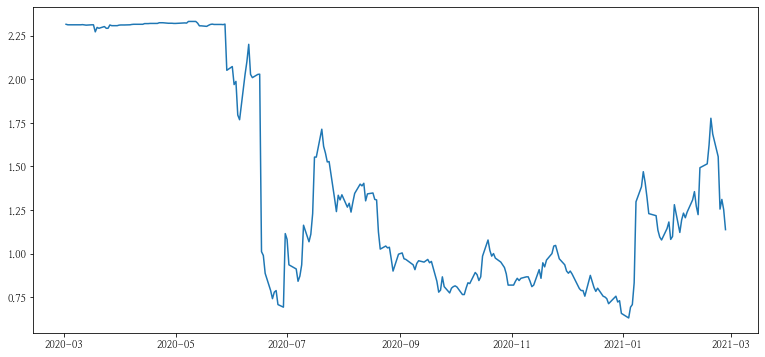

In [33]:
# 로그 변환 시도 
ts_log = np.log(ts)
plt.plot(ts_log)

## 4. 시계열 안정성 분석
- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

### 정성적 그래프 분석
시각화를 통해 안정성 여부를 확인한다. 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화하는 함수를 만든다. 현재 타임스텝부터 window에 주어진 타임스텝 이전 사이 구간의 평균(rolling mean, 이동평균)과 표준편차(rolling std, 이동표준편차)를 원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있다. 그 후 구간 통계치 시각화 함수로 한 번 시각화해본다.

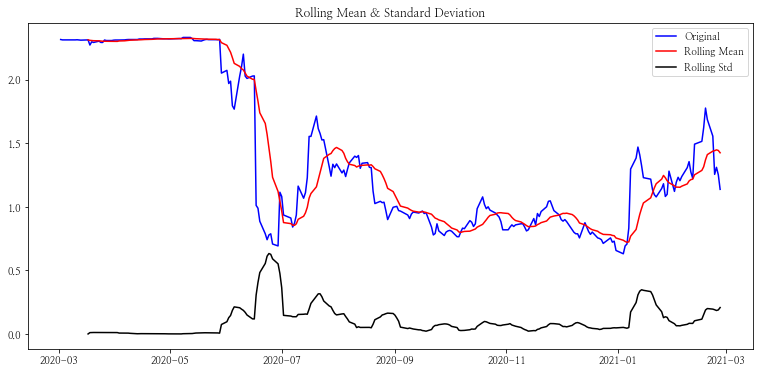

In [34]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
plot_rolling_statistics(ts_log, window=12)

정성적 그래프로 분석했을 때, 이 시계열 데이터는 시간의 추이에 따라 평균과 분산이 증가하므로 안정적이지 않다. 따라서 불안정적 시계열 데이터에 대한 시계열 분석 기법을 통해 미래를 예측해본다. 

### 정량적 Augmented Dicky-Fuller Test
statsmodels 패키지의 adfuller 메소드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행한다. 


In [35]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


In [36]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.803387
p-value                          0.378781
#Lags Used                      14.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


이 시계열이 안정적이지 않다는 귀무가설은 p-value=0.378781 > 0.05이므로 이 귀무가설은 기각할 수 없다. 따라서 이 시계열은 안정적인 시계열이 아니다. 


### 시계열 분해(Time Series Decomposition)
안정적이지 않은 시계열을 안정적인 시계열로 바꾸기 위해 시계열 분해를 한다. statsmodels 라이브러리 안에는 seasonal_decompose 메소드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리 해 낼 수 있는 기능이 있다. 이 기능을 활용하여 훨씬 안정적인 시계열을 분리할 수 있다. 위에서 구했던 로그변환 단계(ts_log)에서부터 출발한다.

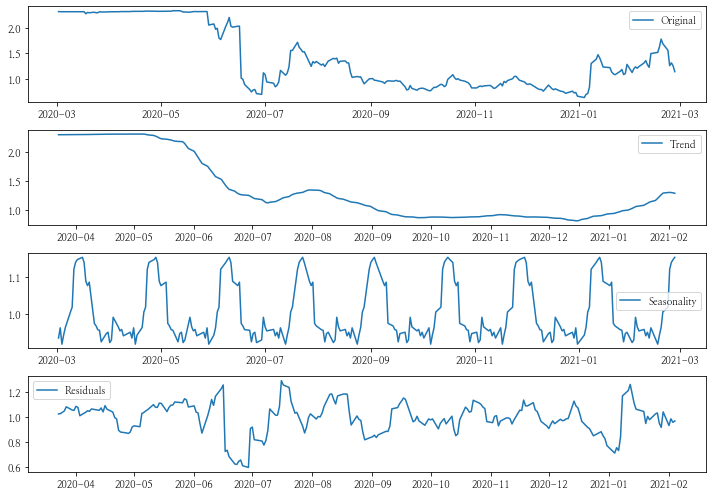

In [37]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 7))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Residual 안정성 확인
Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지가 Residual이다. Residual에 대해 안정성 여부를 살펴본다.

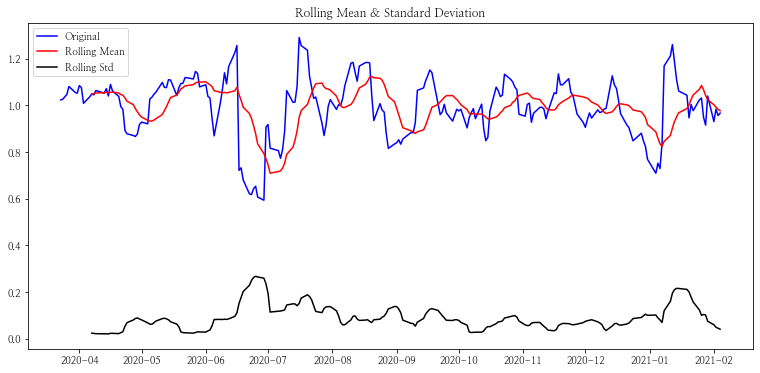

In [38]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [39]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.882216
p-value                          0.000038
#Lags Used                      11.000000
Number of Observations Used    209.000000
Critical Value (1%)             -3.462032
Critical Value (5%)             -2.875471
Critical Value (10%)            -2.574195
dtype: float64


Decomposing을 통해 얻어진 Residual은 매우 낮은 p-value를 보여 준다. 즉 예측 가능한 수준의 안정적인 시계열이 얻어졌다. 

## 5. 학습, 테스트 데이터셋 생성
학습데이터와 평가데이터를 9:1로 나눈다. 

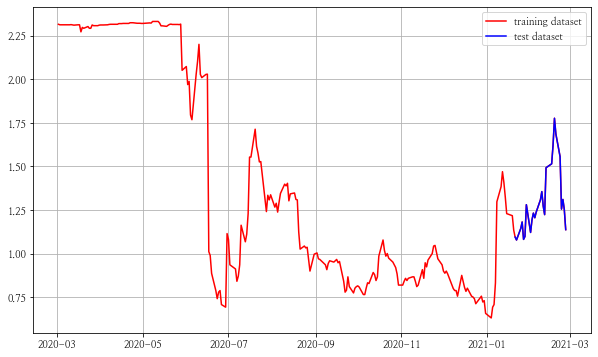

In [40]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

데이터셋의 형태를 확인해본다. 

In [41]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2020-03-02    2.315501
2020-03-03    2.312535
Name: Close, dtype: float64
(225,)
(26,)


## 6. 적정 ARIMA 모수 찾기
- ACF, PACF 그려보기 -> p,q 구하기
- 차분 안정성 확인 -> d 구하기

### ACF, PACF 그려보기 -> p,q 구하기
statsmodels에서 제공하는 ACF와 PACF 플로팅 기능을 사용하여 ACF, PACF를 그린 후, 자기회귀모형(AR)의 시차인 p, 이동모형 균형(MA)의 시차인 q를 구한다. 

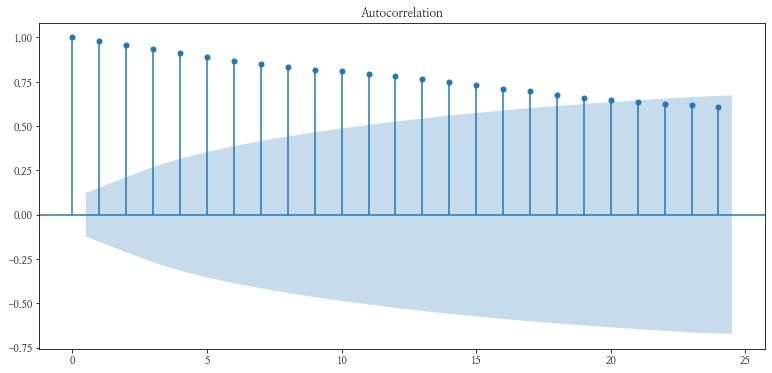

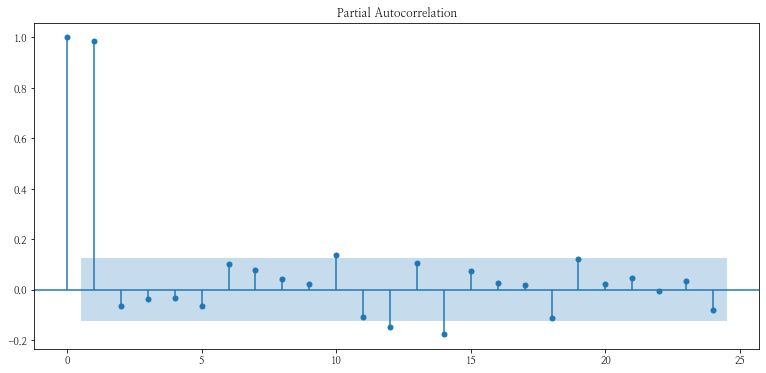

In [42]:
# ACF, PACF 그려보기 -> p,q 구하기

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

PACF 그래프는 시차 p 1에서 유의미한 막대가 있고 그 이후로는 없다. 즉 시차 p 2이상에서는 거의 0에 가깝다. 현재 데이터와 시차 2 이상 떨어진 데이터는 상관도가 없기 때문에 고려할 필요가 없다는 뜻이다. 위의 표에 의하면 p=1이다. 

따라서 이 데이터는 AR(1) 모델에 유사한 형태를 보인다. 그러나 q에 대해서는 적합한 값이 없어 보이므로 q=0으로 둘 수 있다. (하지만 q를 바꿔가며 확인하는 것도 좋다.)

### 차분 안정성 확인 -> d 구하기
d차 차분을 구하여 시계열이 안정된 상태인지 확인한다.

Results of Dickey-Fuller Test:
Test Statistic                  -4.085667
p-value                          0.001023
#Lags Used                      13.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


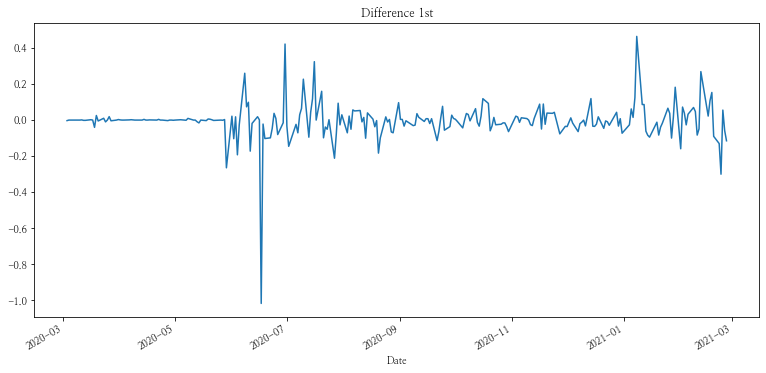

In [43]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

1차 차분했을 때 데이터가 안정적임을 알 수 있다.

## 7. ARIMA 모델 훈련과 테스트
- ARIMA 모델 빌드와 훈련
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

### ARIMA 모델 빌드와 훈련
일단 p=1, d=1, q=0을 모수로 가지는 ARIMA 모델을 훈련한다. 

In [44]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 195.213
Method:                       css-mle   S.D. of innovations              0.101
Date:                Mon, 01 Mar 2021   AIC                           -384.425
Time:                        19:00:41   BIC                           -374.190
Sample:                             1   HQIC                          -380.294
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0053      0.007     -0.725      0.469      -0.020       0.009
ar.L1.D.Close     0.0752      0.067      1.130      0.259      -0.055       0.206
                                    Root

훈련데이터에 대해 ARIMA 모델이 잘 fit하는지 시각화해본다.

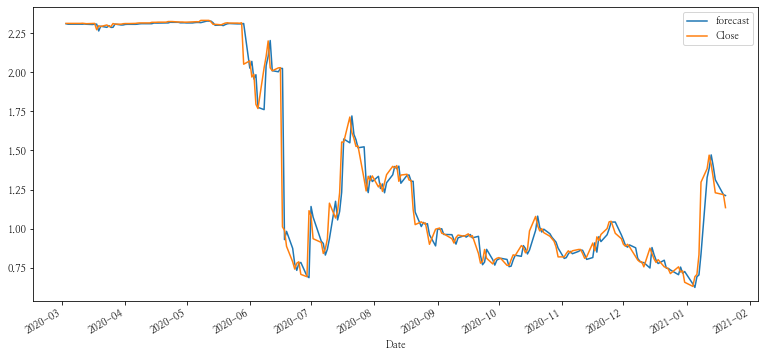

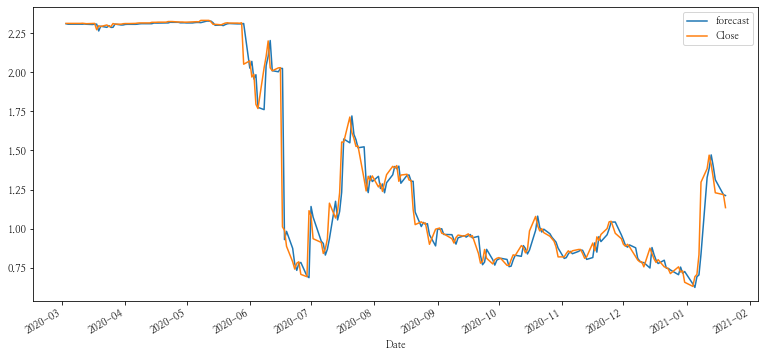

In [45]:
fitted_m.plot_predict()

forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측한다.

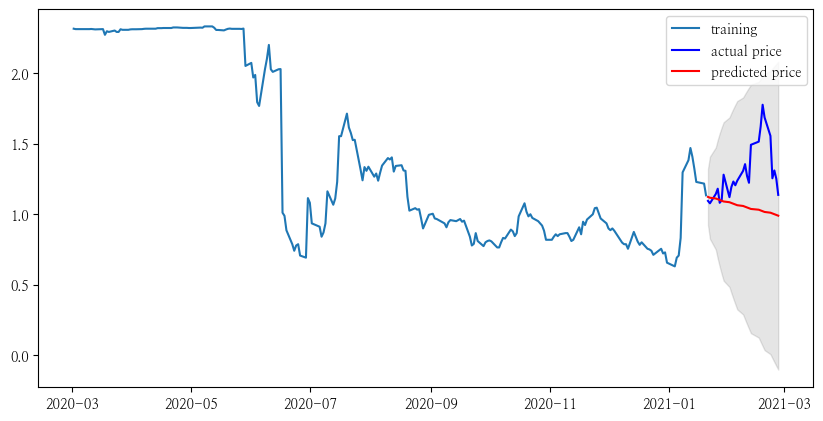

In [46]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

최종적인 모델의 오차율을 계산하려면, 그동안 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 한다. np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산한다. 

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1.4539154125696485
MAE:  0.8708972853304111
RMSE:  1.2057841484153158
MAPE: 20.28%


MAPE: 20.28%로 오차율이 크다.